<a href="https://colab.research.google.com/github/MuthiahAinun/Predictive-Analytics/blob/main/Proyek_Machine_Learning_Predictive_Analytics_Tsamarah_Muthi'ah_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚Proyek Machine Learning- Predictive Analytics: [Dow-Jones-Index-dataset]
- **Nama:** [Tsamarah Muthi'ah Abdullah]
- **Email:** [a135xaf486@devacademy.id]
- **ID Dicoding:** [a135xaf48]

## **🌏Domain Proyek**
Prediksi Pergerakan Saham pada Dow Jones Index

- **Latar Belakang:**
Pergerakan saham yang dinamis memerlukan prediksi untuk membantu investor mengambil keputusan. Dengan menganalisis data historis, kita dapat memprediksi pergerakan saham.

- **Referensi:**
1. Chen, M., & Wei, Y. (2018). Stock Market Prediction using Machine Learning: A Systematic Review. Journal of Economic and Financial Studies.
2. Yu, H., & Yan, X. (2019). Predicting Stock Price Movements with Machine Learning Techniques. IEEE Transactions on Knowledge and Data Engineering.

## **🎯Business Understanding**

**Problem Statements:**
1. Bagaimana cara menyediakan prediksi harga penutupan saham yang akurat untuk membantu investor dalam mengoptimalkan strategi investasi dan meminimalkan risiko kerugian?
2. Bagaimana memilih model prediksi yang dapat memberikan keseimbangan antara akurasi dan interpretabilitas sehingga dapat diandalkan dalam pengambilan keputusan bisnis?

**Goals**

1. Mengembangkan model prediksi harga saham yang dapat membantu investor dalam mengidentifikasi peluang investasi yang menguntungkan dan mengurangi ketidakpastian pasar.
2. Membandingkan performa berbagai algoritma regresi untuk menemukan model yang tidak hanya akurat tetapi juga mudah dipahami oleh investor dalam konteks pengambilan keputusan keuangan.

**Solution Statement:**

1. Menggunakan 5 algoritma regresi, yaitu Linear Regression, Random Forest , Decision Tree, SVR, dan Gradient Boosting.
2. Melakukan evaluasi dengan metrik MSE, R2 Score, MAE, RMSE, dan MAPE untuk membandingkan performa model.
3. Memilih model terbaik berdasarkan keseimbangan antara akurasi prediksi dan interpretabilitas.

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Data Understanding

Dataset yang digunakan dalam proyek ini adalah Dow Jones Index yang diambil dari UCI Machine Learning Repository. Dataset ini berisi informasi terkait pergerakan harga saham Dow Jones dalam periode tertentu.

🔗 Sumber Data:
Dow Jones Index Dataset - UCI Machine Learning Repository

**Link =** 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'

Data memiliki 750 baris dan 16 kolom, dengan dua kolom yang memiliki 30 nilai hilang, yaitu pada Kolom percent_change_volume_over_last_wk dan Kolom previous_weeks_volume.



**Variabel pada Dow Jones Index Dataset:**

1. quarter: Kuartal keuangan (1, 2, 3, atau 4).
2. stock: Kode saham perusahaan.
3. date: Tanggal transaksi.
4. open: Harga pembukaan saham.
5. high: Harga tertinggi selama periode tersebut.
6. low: Harga terendah selama periode tersebut.
7. close: Harga penutupan saham.
8. volume: Volume perdagangan saham.
9. percent_change_price: Persentase perubahan harga saham.
10. percent_change_volume_over_last_wk: Persentase perubahan volume perdagangan dibanding minggu sebelumnya.
11. previous_weeks_volume: Volume perdagangan pada minggu sebelumnya.
12. next_weeks_open: Harga pembukaan saham pada minggu berikutnya.
13. next_weeks_close: Harga penutupan saham pada minggu berikutnya.
14. percent_change_next_weeks_price: Persentase perubahan harga saham pada minggu berikutnya.
15. days_to_next_dividend: Jumlah hari sampai dividen berikutnya.
16. percent_return_next_dividend: Persentase pengembalian pada dividen berikutnya.

In [ ]:
dataset = 'dow_jones_index.csv'

In [ ]:
# Load Dataset
df = pd.read_csv(dataset)
print('\nShape of data:', df.shape)


Shape of data: (750, 16)


In [ ]:
print('Columns:', df.columns)

Columns: Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')


In [ ]:
print(df.head())

   quarter stock       date    open    high     low   close     volume  \
0        1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4        1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19           $15

In [ ]:
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open           

In [ ]:
print('\nStatistik Deskriptif:')
print(df.describe())


Statistik Deskriptif:
          quarter        volume  percent_change_price  \
count  750.000000  7.500000e+02            750.000000   
mean     1.520000  1.175478e+08              0.050262   
std      0.499933  1.584381e+08              2.517809   
min      1.000000  9.718851e+06            -15.422900   
25%      1.000000  3.086624e+07             -1.288053   
50%      2.000000  5.306088e+07              0.000000   
75%      2.000000  1.327218e+08              1.650888   
max      2.000000  1.453439e+09              9.882230   

       percent_change_volume_over_last_wk  previous_weeks_volume  \
count                          720.000000           7.200000e+02   
mean                             5.593627           1.173876e+08   
std                             40.543478           1.592322e+08   
min                            -61.433175           9.718851e+06   
25%                            -19.804284           3.067832e+07   
50%                              0.512586           5.2

In [ ]:
print("Jumlah data:", len(df))

Jumlah data: 750


In [ ]:
# Data Visualization dan Exploratory Data Analysis (EDA)
print('\nData Visualization dan Exploratory Data Analysis (EDA):')
sns.set(style="whitegrid")


Data Visualization dan Exploratory Data Analysis (EDA):


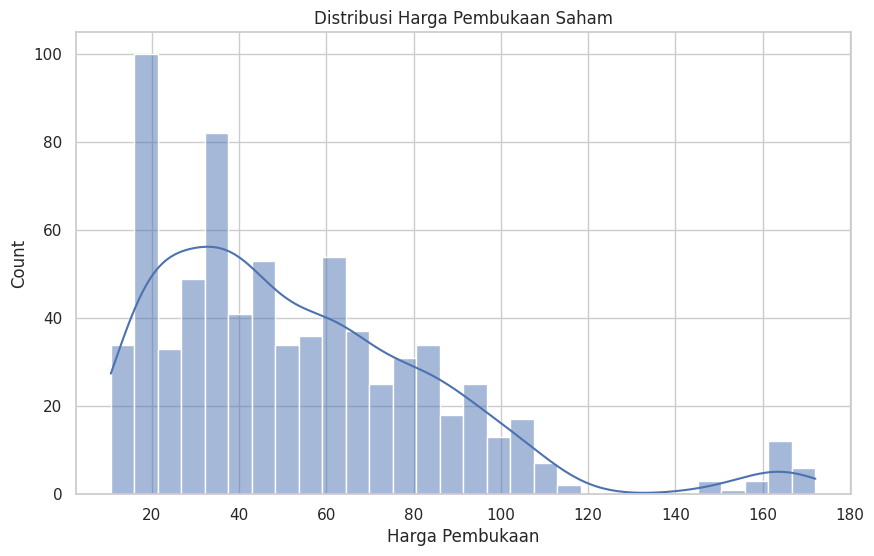

In [ ]:
# Visualisasi distribusi harga pembukaan (open)
plt.figure(figsize=(10, 6))
sns.histplot(df['open'].str.replace('$', '').astype(float), bins=30, kde=True)
plt.title('Distribusi Harga Pembukaan Saham')
plt.xlabel('Harga Pembukaan')
plt.show()

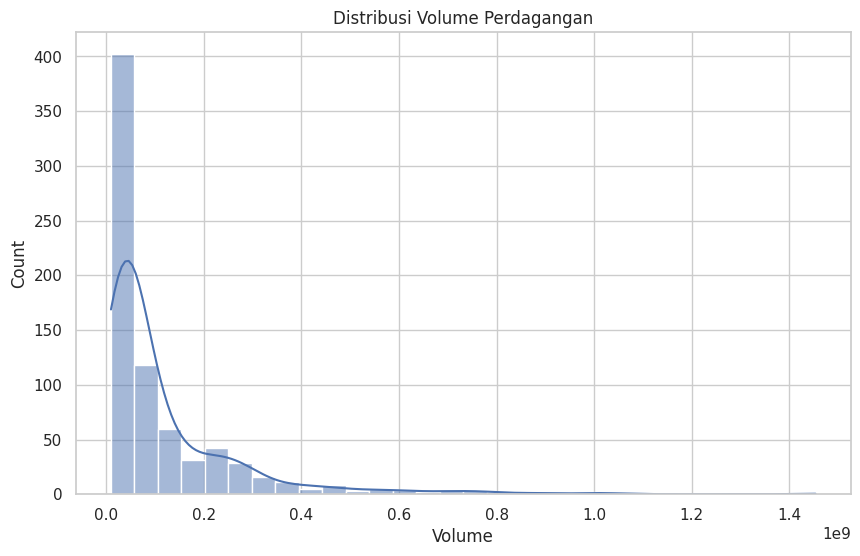

In [ ]:
# Visualisasi distribusi volume perdagangan
plt.figure(figsize=(10, 6))
sns.histplot(df['volume'].astype(float), bins=30, kde=True)
plt.title('Distribusi Volume Perdagangan')
plt.xlabel('Volume')
plt.show()

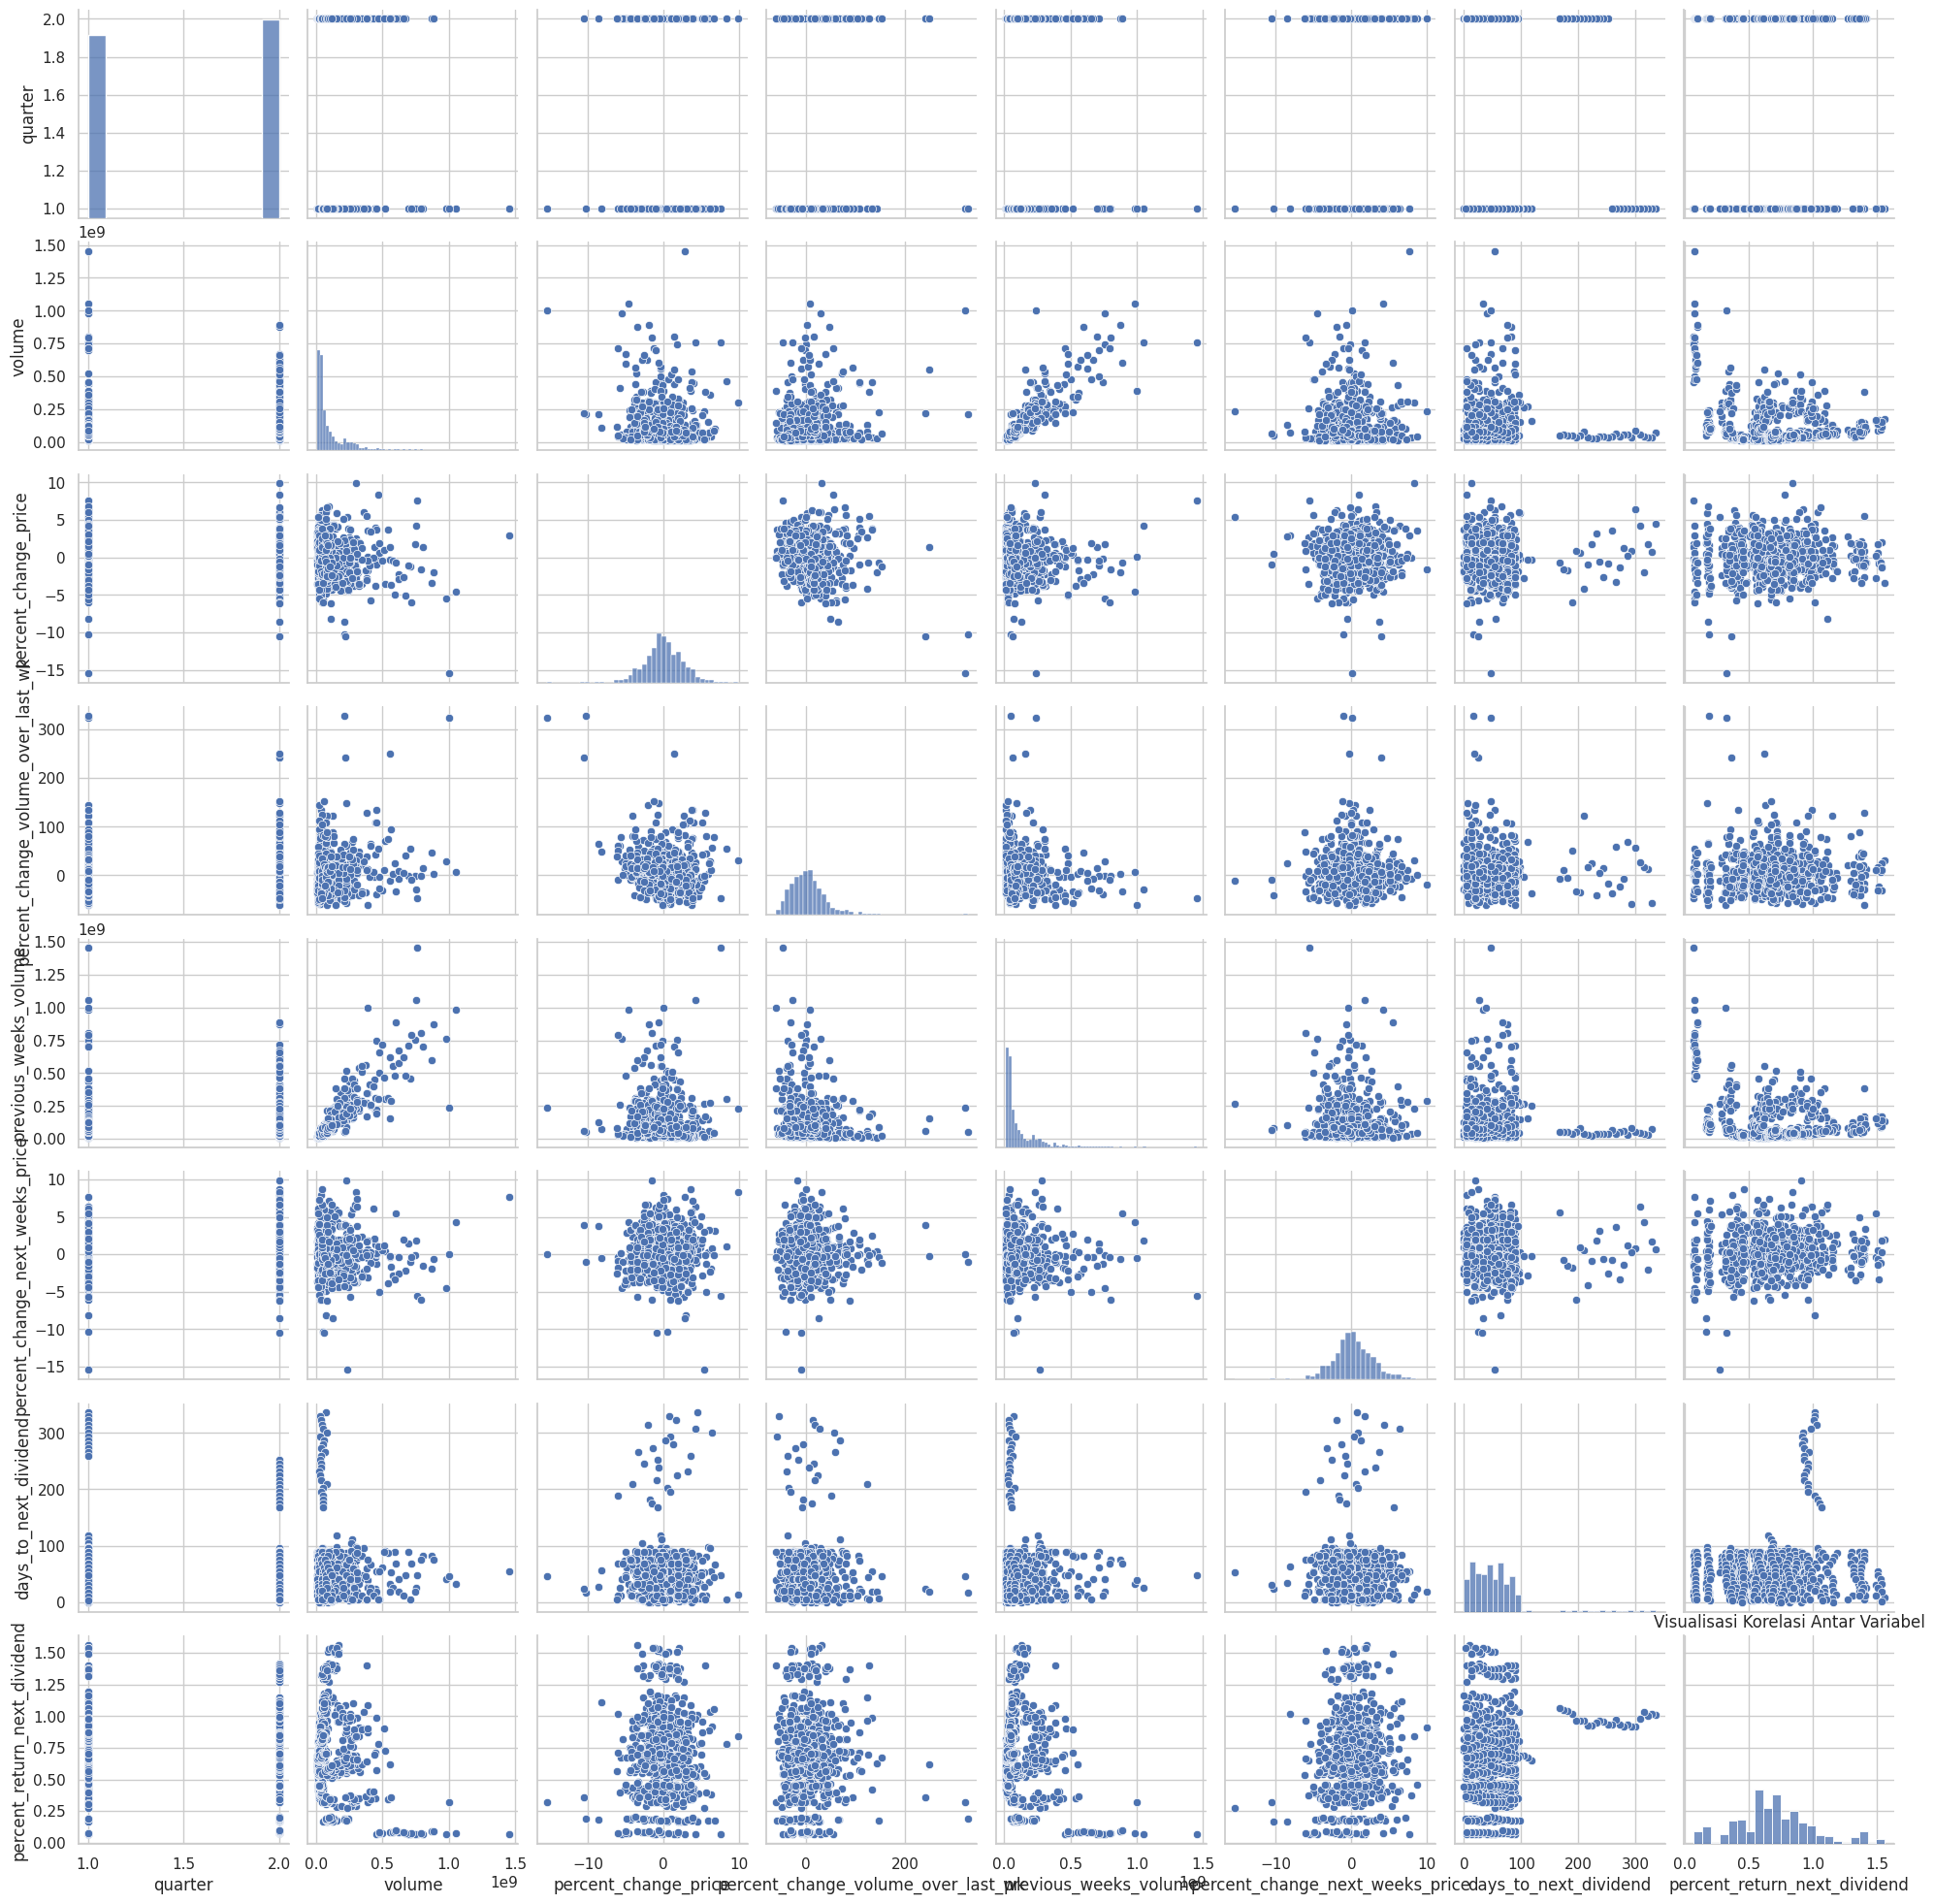

In [ ]:
# Visualisasi pairplot untuk analisis hubungan variabel
sns.pairplot(df)
plt.title('Visualisasi Korelasi Antar Variabel')
plt.show()

# 2. Data Preparation


Teknik data preparation yang dilakukan pada tahap ini meliputi data cleaning, konversi data, encoding, normalisasi, seleksi fitur, dan pembagian data.

## A. Data Cleaning

In [ ]:
# 1. Informasi Statistik untuk Kolom dengan Nilai Hilang
print('Statistik untuk kolom percent_change_volume_over_last_wk:')
print(df['percent_change_volume_over_last_wk'].describe())
print('Jumlah nilai hilang:', df['percent_change_volume_over_last_wk'].isnull().sum())

print('Statistik untuk kolom previous_weeks_volume:')
print(df['previous_weeks_volume'].describe())
print('Jumlah nilai hilang:', df['previous_weeks_volume'].isnull().sum())

Statistik untuk kolom percent_change_volume_over_last_wk:
count    720.000000
mean       5.593627
std       40.543478
min      -61.433175
25%      -19.804284
50%        0.512586
75%       21.800622
max      327.408924
Name: percent_change_volume_over_last_wk, dtype: float64
Jumlah nilai hilang: 30
Statistik untuk kolom previous_weeks_volume:
count    7.200000e+02
mean     1.173876e+08
std      1.592322e+08
min      9.718851e+06
25%      3.067832e+07
50%      5.294556e+07
75%      1.333230e+08
max      1.453439e+09
Name: previous_weeks_volume, dtype: float64
Jumlah nilai hilang: 30


In [ ]:
# Mengecek jumlah missing values di setiap kolom
print(df.isnull().sum())

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64


**Tahapan ini bertujuan untuk mengecek informasi nilai hilang pada data. Nilai hilang dapat mengganggu proses analisis dan prediksi jika tidak ditangani dengan baik.**

In [ ]:
# 2. Imputasi Nilai Hilang dengan Mean

df['percent_change_volume_over_last_wk'].fillna(df['percent_change_volume_over_last_wk'].mean(), inplace=True)
df['previous_weeks_volume'].fillna(df['previous_weeks_volume'].mean(), inplace=True)

<ipython-input-35-58cc7d25c765>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['percent_change_volume_over_last_wk'].fillna(df['percent_change_volume_over_last_wk'].mean(), inplace=True)
<ipython-input-35-58cc7d25c765>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [ ]:
# Informasi Statistik untuk Kolom dengan Nilai Hilang setelah Imputasi
print('\nStatistik untuk kolom percent_change_volume_over_last_wk setelah imputasi:')
print(df['percent_change_volume_over_last_wk'].describe())
print('\nJumlah nilai hilang:', df['percent_change_volume_over_last_wk'].isnull().sum())

print('\nStatistik untuk kolom previous_weeks_volume setelah imputasi:')
print(df['previous_weeks_volume'].describe())
print('\nJumlah nilai hilang:', df['previous_weeks_volume'].isnull().sum())


Statistik untuk kolom percent_change_volume_over_last_wk setelah imputasi:
count    7.500000e+02
mean     1.539509e-17
std      1.000667e+00
min     -1.688471e+00
25%     -6.167909e-01
50%     -9.551814e-02
75%      3.625200e-01
max      8.106845e+00
Name: percent_change_volume_over_last_wk, dtype: float64

Jumlah nilai hilang: 0

Statistik untuk kolom previous_weeks_volume setelah imputasi:
count    7.500000e+02
mean    -8.526513e-17
std      1.000667e+00
min     -6.905976e-01
25%     -5.523496e-01
50%     -3.993339e-01
75%      7.844039e-02
max      8.569555e+00
Name: previous_weeks_volume, dtype: float64

Jumlah nilai hilang: 0


**Teknik yang digunakan adalah imputasi dengan rata-rata untuk mengisi nilai hilang pada kolom 'percent_change_volume_over_last_wk' dan 'previous_weeks_volume'.**

## B. Konversi Data

In [ ]:
# 3. Menghapus simbol dolar dan mengonversi ke float
for col in ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

**Simbol dolar ($) pada kolom harga dapat menghambat proses perhitungan sehingga perlu dikonversi menjadi tipe data numerik (float).**

## C. Encoding

In [ ]:
# 4. Encoding Variabel Kategorikal
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['stock'] = encoder.fit_transform(df['stock'])

**Encoding diperlukan untuk mengubah data kategorikal menjadi numerik agar dapat digunakan dalam algoritma pembelajaran mesin.**

## D. Normalisasi

In [ ]:
# 5. Feature Scaling
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

**Normalisasi bertujuan untuk menyamakan skala data numerik agar model dapat belajar secara optimal.**

## E. Seleksi Fitur

In [ ]:
# 6. Feature Selection
# Menghapus kolom date sebelum menghitung korelasi jika ada
if 'date' in df.columns:
    df = df.drop(['date'], axis=1)
correlation_matrix = df.corr()
print('\nMatriks Korelasi:')
print(correlation_matrix)


Matriks Korelasi:
                                         quarter         stock      open  \
quarter                             1.000000e+00  1.148711e-16  0.025883   
stock                               1.148711e-16  1.000000e+00  0.067581   
open                                2.588302e-02  6.758090e-02  1.000000   
high                                2.472680e-02  6.466508e-02  0.999607   
low                                 2.472986e-02  7.158654e-02  0.999344   
close                               2.210224e-02  6.726752e-02  0.999044   
volume                             -4.759850e-02 -2.074841e-01 -0.513424   
percent_change_price               -8.095927e-02  3.263613e-02  0.061485   
percent_change_volume_over_last_wk  2.312201e-02 -9.287712e-03 -0.008369   
previous_weeks_volume              -5.599414e-02 -2.037511e-01 -0.503481   
next_weeks_open                     2.101787e-02  6.691561e-02  0.998942   
next_weeks_close                    1.910273e-02  6.667824e-02  0.997

**Seleksi fitur dilakukan untuk mengurangi dimensionalitas dan mempertahankan variabel yang memiliki korelasi tinggi terhadap variabel target. Pada tahap ini, kolom 'date' dihapus karena tidak relevan dalam proses prediksi.**

## F. Data Splitting

In [ ]:
# 7. Data Splitting
from sklearn.model_selection import train_test_split
X = df.drop(['next_weeks_close'], axis=1)
y = df['next_weeks_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('\nData berhasil dipisahkan menjadi data latih dan data uji.')


Data berhasil dipisahkan menjadi data latih dan data uji.


**Tahapan ini bertujuan untuk membagi data menjadi data latih dan data uji guna menguji performa model secara objektif.**

# 3. Modeling

1. Pada tahap modeling, berbagai algoritma regresi akan digunakan untuk memprediksi harga penutupan saham minggu berikutnya, beberapa algoritma di antaranya, yaitu:

- **Linear Regression:**
  - Kelebihan: Sederhana, mudah diinterpretasikan, dan efektif jika hubungan antara variabel bersifat linear.
  - Kekurangan: Kurang akurat jika terdapat hubungan non-linear antara variabel.
  - 📌 Cara Kerja:
Linear Regression mencoba mencari garis lurus terbaik yang bisa mewakili hubungan antara variabel input (X) dan output (Y). Model ini menghitung kemiringan garis (koefisien) sehingga meminimalkan selisih antara nilai prediksi dan nilai sebenarnya.

- **Decision Tree Regressor:**
  - Kelebihan: Mampu menangani data non-linear, mudah diinterpretasikan.
  - Kekurangan: Rentan terhadap overfitting terutama pada data dengan banyak fitur.
  - 📌 Cara Kerja:
Decision Tree Regressor adalah model berbasis pohon keputusan, di mana data dibagi menjadi beberapa subset berdasarkan aturan keputusan tertentu hingga mencapai kondisi akhir (leaf node). Model ini bekerja dengan membangun pohon yang membagi data ke dalam kelompok yang lebih homogen, meminimalkan kesalahan dengan menghitung Mean Squared Error (MSE) pada setiap percabangan.

- **Random Forest Regressor:**
  - Kelebihan: Mengurangi overfitting dibandingkan Decision Tree dengan menggabungkan banyak pohon keputusan.
  - Kekurangan: Lebih kompleks dan membutuhkan lebih banyak sumber daya komputasi.
  - 📌 Cara Kerja:
Random Forest adalah ensemble model yang terdiri dari banyak Decision Tree. Model ini membuat prediksi dengan menggabungkan hasil dari banyak pohon keputusan untuk mengurangi overfitting dan meningkatkan akurasi. Setiap pohon dibangun menggunakan subset acak dari data (Bootstrap Sampling), dan hasil akhirnya diperoleh dengan rata-rata prediksi dari semua pohon.

- **Support Vector Regressor (SVR):**
  - Kelebihan: Efektif dalam data berdimensi tinggi dan robust terhadap outlier
  - Kekurangan: Waktu komputasi yang tinggi pada dataset besar.
  - 📌 Cara Kerja:
Support Vector Regressor (SVR) menggunakan prinsip Support Vector Machines (SVM) untuk melakukan regresi. Model ini bekerja dengan mencari hyperplane optimal yang dapat meminimalkan kesalahan dalam margin tertentu (disebut sebagai epsilon-tube).

- **Gradient Boosting Regressor:**
  - Kelebihan: Akurasi yang tinggi dengan cara menggabungkan model yang lemah secara bertahap.
  - Kekurangan: Rentan terhadap overfitting jika parameter tidak diatur dengan baik.
  - 📌 Cara Kerja:
Gradient Boosting adalah model berbasis boosting, di mana setiap pohon baru berusaha memperbaiki kesalahan dari pohon sebelumnya. Model ini menggunakan gradient descent untuk meminimalkan kesalahan prediksi secara bertahap.

2. **Proses pemodelan dilakukan dengan menggunakan parameter default pada masing-masing model.** Setelah itu, dilakukan evaluasi menggunakan metrik seperti MSE, R2 Score, MAE, RMSE, dan MAPE.



In [ ]:
# Modeling
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# 4. Evaluation

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    print(f'\n{name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%')


Linear Regression - MSE: 0.0008, R2 Score: 0.9992, MAE: 0.0189, RMSE: 0.0289, MAPE: 4.44%

Decision Tree - MSE: 0.0031, R2 Score: 0.9970, MAE: 0.0338, RMSE: 0.0554, MAPE: 24.62%

Random Forest - MSE: 0.0016, R2 Score: 0.9985, MAE: 0.0244, RMSE: 0.0396, MAPE: 13.65%

SVR - MSE: 0.0196, R2 Score: 0.9808, MAE: 0.0789, RMSE: 0.1398, MAPE: 25.08%

Gradient Boosting - MSE: 0.0011, R2 Score: 0.9990, MAE: 0.0184, RMSE: 0.0327, MAPE: 11.87%


# **Evaluasi:**

1. Pada tahap evaluasi, metrik yang digunakan adalah MSE, R2 Score, MAE, RMSE, dan MAPE:
  - **MSE (Mean Squared Error):**
    - Mengukur rata-rata kesalahan kuadrat antara nilai prediksi dan nilai aktual. Semakin kecil nilainya, semakin baik model dalam memprediksi nilai sebenarnya.
    - Formula: MSE = (1/n) * Σ(actual - predicted)^2
    - Metrik ini bekerja dengan menghitung selisih antara nilai aktual dan nilai prediksi, kemudian mengkuadratkan selisih tersebut dan menghitung rata-ratanya.
    - MSE sangat sensitif terhadap outlier karena menggunakan kuadrat dari kesalahan.

   - **R2 Score (Coefficient of Determination):**
    - Mengukur seberapa baik model menjelaskan variabilitas data aktual. Semakin mendekati 1, semakin baik model dalam menjelaskan data.
    - Formula: R2 = 1 - (Σ(actual - predicted)^2 / Σ(actual - mean_actual)^2)
    - R2 Score mengukur proporsi variansi dalam variabel dependen yang dapat dijelaskan oleh variabel independen.

  - **MAE (Mean Absolute Error):**
    - Mengukur rata-rata kesalahan absolut antara nilai prediksi dan aktual. Semakin kecil nilainya, semakin akurat prediksi model.
    - Formula: MAE = (1/n) * Σ|actual - predicted|
    - Metrik ini bekerja dengan menghitung rata-rata dari nilai absolut kesalahan prediksi.

  - **RMSE (Root Mean Squared Error):**
    - Akar dari MSE, mengembalikan satuan data asli sehingga lebih mudah diinterpretasikan. Semakin rendah, semakin baik.
    - Formula: RMSE = sqrt(MSE)
    - Metrik ini bekerja dengan menghitung akar dari MSE, sehingga lebih mudah dipahami dalam konteks satuan aslinya.

  - **MAPE (Mean Absolute Percentage Error):**
    - Mengukur persentase kesalahan rata-rata absolut. Semakin rendah persentasenya, semakin akurat model.
    - Formula: MAPE = (1/n) * Σ(|actual - predicted| / |actual|) * 100%
    - Metrik ini bekerja dengan menghitung rata-rata persentase kesalahan absolut terhadap nilai aktual.

2. Berdasarkan hasil evaluasi, berikut perbandingan performa model:
  - Linear Regression: MSE: 0.0008, R2: 0.9992, MAE: 0.0189, RMSE: 0.0289, MAPE: 4.44%
  - Decision Tree: MSE: 0.0031, R2: 0.9970, MAE: 0.0338, RMSE: 0.0554, MAPE: 24.62%
  - Random Forest: MSE: 0.0016, R2: 0.9985, MAE: 0.0244, RMSE: 0.0396, MAPE: 13.65%
  - SVR: MSE: 0.0196, R2: 0.9808, MAE: 0.0789, RMSE: 0.1398, MAPE: 25.08%
  - Gradient Boosting: MSE: 0.0011, R2: 0.9990, MAE: 0.0184, RMSE: 0.0327, MAPE: 11.87%

3. Setelah melakukan perbandingan dari semua model, didapatkan bahwa Linear Regression memiliki performa terbaik dengan nilai MSE terendah (0.0008), R2 tertinggi (0.9992), MAE terendah (0.0189), RMSE terendah (0.0289), dan MAPE terendah (4.44%). Oleh karena itu, model terbaik yang dipilih adalah Linear Regression, karena memberikan akurasi yang tinggi dan interpretasi yang mudah, dibandingkan model lain yang cenderung lebih kompleks dan rentan terhadap overfitting.

4. **Analisis Dampak terhadap Business Understanding:**

  **Apakah model menjawab Problem Statement?**

- Model yang dikembangkan mampu memberikan prediksi harga penutupan saham untuk membantu investor dalam pengambilan keputusan.

- Algoritma Linear Regression dan Gradient Boosting menunjukkan performa terbaik berdasarkan evaluasi metrik, hal ini dapat memberikan prediksi yang lebih akurat untuk mendukung strategi investasi.

  **Apakah tujuan telah tercapai?**

- Model prediksi telah dikembangkan dan diuji dengan berbagai algoritma regresi.

- Model terbaik telah dipilih berdasarkan keseimbangan antara akurasi dan kemudahan interpretasi, sehingga dapat digunakan oleh investor untuk mengidentifikasi peluang pasar.

  **Apakah solusi yang direncanakan berdampak?**

- Linear Regression menunjukkan performa terbaik dengan MSE terendah (0.0008), R² tertinggi (0.9992), dan MAPE terendah (4.44%), memberikan perkiraan harga yang dapat membantu investor membuat keputusan yang lebih terinformasi.

- Gradient Boosting juga memberikan hasil yang kompetitif, meskipun lebih kompleks dalam interpretasi, sehingga lebih cocok bagi investor atau perusahaan yang memiliki akses ke analisis berbasis machine learning.

- Decision Tree dan SVR memiliki MAPE yang cukup tinggi (>20%), sehingga kurang dapat diandalkan dalam strategi investasi yang memerlukan prediksi akurat.

## **Kesimpulan:**

  Model terbaik berdasarkan evaluasi adalah **Linear Regression**, karena memiliki keseimbangan terbaik antara akurasi dan interpretabilitas dengan nilai error terendah serta R2 Score tertinggi. Hal ini menunjukkan bahwa model ini paling akurat dalam memprediksi harga penutupan saham minggu berikutnya.

  Meskipun model Gradient Boosting juga memiliki performa yang mendekati Linear Regression dengan MSE: 0.0011 dan R2: 0.9990, Linear Regression tetap lebih unggul pada beberapa metrik lainnya. Selain itu, Linear Regression juga lebih sederhana dan mudah diinterpretasikan, sehingga menjadi pilihan terbaik.
